In [ ]:
# default_exp moving_avg

# Moving Average Forecast

> Practical Assignment 1

In [ ]:
#hide
from nbdev.showdoc import *

1.  Calculate MAD, MSE, RMSE, and MAPE error for the 6 mo Moving Average forecast and compare them to relevant accuracy measures for the 3mo Moving Average Forecast.  Which seems to be a more accurate model?  Why? Does your conclusion depend on which measure you use?

2.  Generate the cumulative error graph and turning point graph for the 6mo Moving Average forecast and compare them to the results for 3mo Moving Average Forecast.  Which models seems to perform better?

3. Repeat the exercises for the Seasonally Adjusted Data, i.e. generate 3mo and 6mo Moving Average forecasts, calculate accuracy measures, generate cumulative error and turning point graphs and compare the two models.

4. In general, how do measures of accuracy and graphs compare between the NSA and SA data?  In other words, are errors larger/smaller, is there difference in turning point predictions, etc.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Question 1

### Read data from excel

In [ ]:
df = pd.read_excel("../data/unemployment_rate.xls")
print(df.head())

  observation_date  UNRATE_SA  UNRATENSA
0       1948-01-01        3.4        4.0
1       1948-02-01        3.8        4.7
2       1948-03-01        4.0        4.5
3       1948-04-01        3.9        4.0
4       1948-05-01        3.5        3.4


### Find Moving Average forecast

In [ ]:
#export
def moving_avg(n_month, df, df_column):
    """
    Get an array of n-month moving averages.
    
    Arguments:
    n_month: the number of continuous months for moving average
    df: dataframe
    df_column: the column containing data
    """
    # get number of rows
    num_dates = df.shape[0]
    
    ma_forecasts = np.zeros(num_dates)

    for idx in range(n_month, num_dates):
        ma = np.mean(df_column[idx-n_month:idx])
        ma_forecasts[idx] = ma
    return ma_forecasts

In [ ]:
# 3 month moving average
ma_3mo = moving_avg(3, df, df['UNRATENSA'])
df['3mo-ma-forecast'] = ma_3mo

# 6 month moving average
ma_6mo = moving_avg(6, df, df['UNRATENSA'])
df['6mo-ma-forecast'] = ma_6mo

print(df[0:7])

  observation_date  UNRATE_SA  UNRATENSA  3mo-ma-forecast  6mo-ma-forecast
0       1948-01-01        3.4        4.0         0.000000         0.000000
1       1948-02-01        3.8        4.7         0.000000         0.000000
2       1948-03-01        4.0        4.5         0.000000         0.000000
3       1948-04-01        3.9        4.0         4.400000         0.000000
4       1948-05-01        3.5        3.4         4.400000         0.000000
5       1948-06-01        3.6        3.9         3.966667         0.000000
6       1948-07-01        3.6        3.9         3.766667         4.083333


### MAD, MSE, RMSE, MAPE (Q1)

In [ ]:
#export
def mad(n_month, predicted, target):
    """Mean absolute deviation"""
    abs_deviations = [abs(predicted[i] - target[i]) for i in range(n_month, len(predicted))]
    return np.mean(abs_deviations)

def mse(n_month, predicted, target):
    """Mean squared error"""
    squared_errors = [(predicted[i] - target[i])**2 for i in range(n_month, len(predicted))]
    return np.mean(squared_errors)

def rmse(n_month, predicted, target):
    """Root mean squared error"""
    return math.sqrt(mse(n_month, predicted, target))

def mape(n_month, predicted, target):
    """Mean abosolute percentage error (in %)"""
    abs_percent = [abs(predicted[i] - target[i]) / target[i] * 100 for i in range(n_month, len(predicted))]
    return np.mean(abs_percent)

In [ ]:
print("3 month")
print("MAD: ", mad(3, df['3mo-ma-forecast'], df['UNRATENSA']))
print("MSE: ", mse(3, df['3mo-ma-forecast'], df['UNRATENSA']))
print("RMSE: ", rmse(3, df['3mo-ma-forecast'], df['UNRATENSA']))
print("MAPE: ", mape(3, df['3mo-ma-forecast'], df['UNRATENSA']))

3 month
MAD:  0.45249709639953545
MSE:  0.34759839979352175
RMSE:  0.5895747618356146
MAPE:  8.289149323807703


In [ ]:
print("6 month")
print("MAD: ", mad(6, df['6mo-ma-forecast'], df['UNRATENSA']))
print("MSE: ", mse(6, df['6mo-ma-forecast'], df['UNRATENSA']))
print("RMSE: ", rmse(6, df['6mo-ma-forecast'], df['UNRATENSA']))
print("MAPE: ", mape(6, df['6mo-ma-forecast'], df['UNRATENSA']))

6 month
MAD:  0.4855672105672106
MSE:  0.4253978891478891
RMSE:  0.6522253361744613
MAPE:  8.743678060315847


##### Q1 Text Answer
According to the MAD, MSE, RMSE, and MAPE error measures calculated above, the 3-month moving average model is more accurate. All error measures for the 3-month model are lower than the 6-month model. My conclusion depends on all 4 error measures.

## Question 2

### Cumulative error graph (Q2)

In [ ]:
#export
def cumulative_error(n_month, predicted, target):
    errors = [target[i] - predicted[i] for i in range(n_month, len(predicted))]
    return np.cumsum(errors)        

In [ ]:
cum_error_3mo = cumulative_error(3, df['3mo-ma-forecast'], df['UNRATENSA'])
cum_error_6mo = cumulative_error(6, df['6mo-ma-forecast'], df['UNRATENSA'])

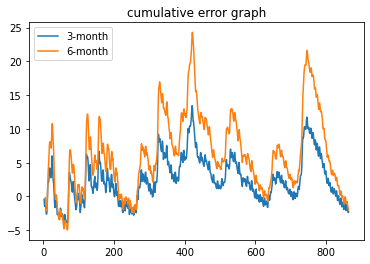

In [ ]:
%matplotlib inline
plt.plot(range(3, len(cum_error_3mo)+3), cum_error_3mo, label='3-month')
plt.plot(range(6, len(cum_error_6mo)+6), cum_error_6mo, label='6-month')
plt.title("cumulative error graph")
plt.legend()
plt.show()

### Turning point graph (Q2)

In [ ]:
#export
def change_in_variable(n_month, target):
    return [target[i] - target[i-1] for i in range(n_month+1, len(target))]

def change_in_forecast(n_month, predicted):
    return [predicted[i] - predicted[i-1] for i in range(n_month+1, len(predicted))]

In [ ]:
change_variable_3mo = change_in_variable(3, df['UNRATENSA'])
change_forecast_3mo = change_in_forecast(3, df['3mo-ma-forecast'])

change_variable_6mo = change_in_variable(6, df['UNRATENSA'])
change_forecast_6mo = change_in_forecast(6, df['6mo-ma-forecast'])

In [ ]:
#export
def turning_point_graph(n_month, change_in_variable, change_in_forecast):
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k', lw=1)
    ax.axvline(x=0, color='k', lw=1)
    ax.axline([0, 0], [1, 1], color='r', lw=1.5)
    ax.scatter(change_in_forecast, change_in_variable, s=1)
    plt.xlabel("Forecast Change")
    plt.ylabel("Actual Change")
    plt.title(f"turning point graph - {n_month} month")
    plt.show()

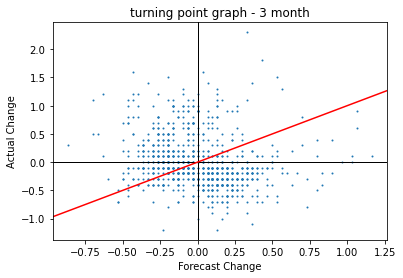

In [ ]:
turning_point_graph(3, change_variable_3mo, change_forecast_3mo)

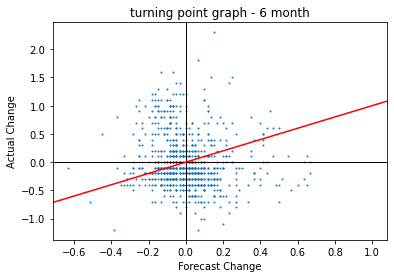

In [ ]:
turning_point_graph(6, change_variable_6mo, change_forecast_6mo)

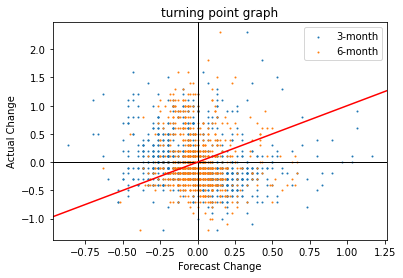

In [ ]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', lw=1)
ax.axvline(x=0, color='k', lw=1)
ax.axline([0, 0], [1, 1], color='r', lw=1.5)
ax.scatter(change_forecast_3mo, change_variable_3mo, s=1, label='3-month')
ax.scatter(change_forecast_6mo, change_variable_6mo, s=1, label='6-month')
plt.xlabel("Forecast Change")
plt.ylabel("Actual Change")
plt.title(f"turning point graph")
plt.legend()
plt.show()

##### Q2 Text Answer
According to the cumulative error graph, the 3-month moving average model performs better because its cumulative errors are lower. Based on the turning point graph, it is hard to tell which model performs better. Either model lands close to the perfect prediction line.

## Question 3

### Repeat for Seasonally Adjusted Data (Q3)

Get forecasts

In [ ]:
# 3 month moving average
ma_3mo = moving_avg(3, df, df['UNRATE_SA'])
df['sa-3mo-ma-forecast'] = ma_3mo

# 6 month moving average
ma_6mo = moving_avg(6, df, df['UNRATE_SA'])
df['sa-6mo-ma-forecast'] = ma_6mo

print(df[0:7])

  observation_date  UNRATE_SA  UNRATENSA  3mo-ma-forecast  6mo-ma-forecast  \
0       1948-01-01        3.4        4.0         0.000000         0.000000   
1       1948-02-01        3.8        4.7         0.000000         0.000000   
2       1948-03-01        4.0        4.5         0.000000         0.000000   
3       1948-04-01        3.9        4.0         4.400000         0.000000   
4       1948-05-01        3.5        3.4         4.400000         0.000000   
5       1948-06-01        3.6        3.9         3.966667         0.000000   
6       1948-07-01        3.6        3.9         3.766667         4.083333   

   sa-3mo-ma-forecast  sa-6mo-ma-forecast  
0            0.000000                 0.0  
1            0.000000                 0.0  
2            0.000000                 0.0  
3            3.733333                 0.0  
4            3.900000                 0.0  
5            3.800000                 0.0  
6            3.666667                 3.7  


Get error measures

In [ ]:
print("3 month")
print("MAD: ", mad(3, df['sa-3mo-ma-forecast'], df['UNRATE_SA']))
print("MSE: ", mse(3, df['sa-3mo-ma-forecast'], df['UNRATE_SA']))
print("RMSE: ", rmse(3, df['sa-3mo-ma-forecast'], df['UNRATE_SA']))
print("MAPE: ", mape(3, df['sa-3mo-ma-forecast'], df['UNRATE_SA']))

3 month
MAD:  0.20445218737901666
MSE:  0.08396567299006324
RMSE:  0.2897683091541641
MAPE:  3.6444884021964956


In [ ]:
print("6 month")
print("MAD: ", mad(6, df['sa-6mo-ma-forecast'], df['UNRATE_SA']))
print("MSE: ", mse(6, df['sa-6mo-ma-forecast'], df['UNRATE_SA']))
print("RMSE: ", rmse(6, df['sa-6mo-ma-forecast'], df['UNRATE_SA']))
print("MAPE: ", mape(6, df['sa-6mo-ma-forecast'], df['UNRATE_SA']))

6 month
MAD:  0.3013597513597514
MSE:  0.18971315721315724
RMSE:  0.4355607388334688
MAPE:  5.243036319115769


Graph

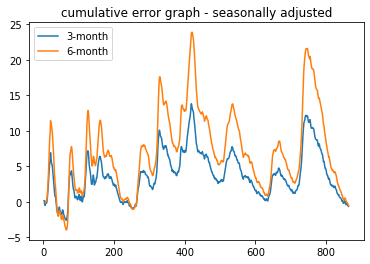

In [ ]:
cum_error_3mo = cumulative_error(3, df['sa-3mo-ma-forecast'], df['UNRATE_SA'])
cum_error_6mo = cumulative_error(6, df['sa-6mo-ma-forecast'], df['UNRATE_SA'])

plt.plot(range(3, len(cum_error_3mo)+3), cum_error_3mo, label='3-month')
plt.plot(range(6, len(cum_error_6mo)+6), cum_error_6mo, label='6-month')
plt.title("cumulative error graph - seasonally adjusted")
plt.legend()
plt.show()

In [ ]:
change_variable_3mo = change_in_variable(3, df['UNRATE_SA'])
change_forecast_3mo = change_in_forecast(3, df['sa-3mo-ma-forecast'])

change_variable_6mo = change_in_variable(6, df['UNRATE_SA'])
change_forecast_6mo = change_in_forecast(6, df['sa-6mo-ma-forecast'])

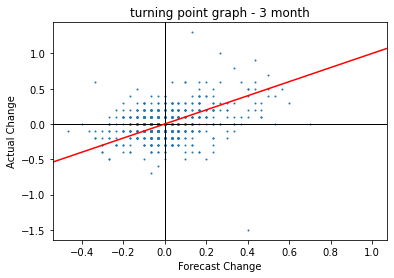

In [ ]:
turning_point_graph(3, change_variable_3mo, change_forecast_3mo)

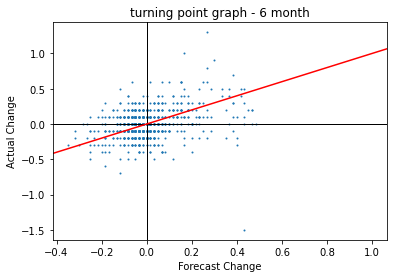

In [ ]:
turning_point_graph(6, change_variable_6mo, change_forecast_6mo)

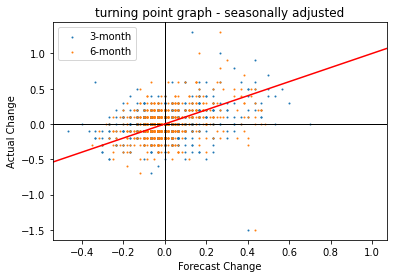

In [ ]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', lw=1)
ax.axvline(x=0, color='k', lw=1)
ax.axline([0, 0], [1, 1], color='r', lw=1.5)
ax.scatter(change_forecast_3mo, change_variable_3mo, s=1, label='3-month')
ax.scatter(change_forecast_6mo, change_variable_6mo, s=1, label='6-month')
plt.xlabel("Forecast Change")
plt.ylabel("Actual Change")
plt.title(f"turning point graph - seasonally adjusted")
plt.legend()
plt.show()

##### Q3 Text Answer
According to the MAD, MSE, RMSE, and MAPE error measures calculated above, the 3-month moving average model is more accurate. All error measures for the 3-month model are lower than the 6-month model. My conclusion depends on all 4 error measures.

The 3-month model is better according to the cumulative error graph. Two models look similar based on the turning point graph.

## Question 4

##### Q4 Text Answer

Comparison between the NSA and SA data:

All of the error measures obtained from the SA data are lower than the ones from the NSA data. The SA data produces smaller errors.

The cumulative error graph of the SA data is smoother than that of the NSA data. In other words, there are less clustered ups and downs on the graph.

The turning point graphs show major differences between SA and NSA data. The points for the SA data center around the perfect prediction line more tightly. Although many points do not fall into the desired quadrants, there is still a noticable trend that aligns with the 45-degree line. In contrast, the points for the NSA data are more spread out and we cannot see a clear trend. Therefore, based on the turning point graphs, using the SA data will produce better predictions.